<center> <img src="logo_ifba.jpg" alt="jpg_python" width="100" height=""> </center>
<br><br>
<div align="center"><span style="font-size: 26px;"><strong>Análise de Dados Com Python</strong></span>
</div><br><br></center>
<center> <img src="python_gif.gif" alt="gif_python" width="80"> </center>

<div style="border: 2px solid black; padding: 10px; width: 100%; background-color: lightgray; display: flex; align-items: center;">
    <h1 style="color: red; text-align: center; margin: auto;">
        Mistura Gaussiana Passo-a-Passo
    </h1>
</div>

<font color='red'></font>
<a href=""></a>

Vamos criar um exemplo básico referentes à Mistura Gaussiana, que se pode resolver à mão, ideal para compreensão ao passo que iremos, em cada etapa, apresentando a implementação computacional da mesma.

In [ ]:
import numpy as np
from scipy.stats import norm

# Exemplo: Mistura de Duas Gaussianas

A clusterização será apresentada ao final após desenvolvermos as versões do algoritmo da mistura gaussiana para $K$ populações.

## Processo Passo-a-Passo (1 Variável)

### Dados

Consideremos o seguinte conjunto de dados $X = \{160, 165, 170, 175, 180, 185\}$:

In [ ]:
# Dados
X = np.array([160, 165, 170, 175, 180, 185])

### Inicialização dos Parâmetros

Nossa tarefa é modelar esses dados usando uma mistura de duas Gaussianas. Para simplificar, vamos supor algumas coisas:

1. **Médias Iniciais ($\mu_{1}$ e $\mu_{2}$)**: Vamos começar supondo que uma Gaussiana tem média $165$ (a mais baixa) e a outra $180$ (a mais alta).

2. **Variâncias Inciais ($\sigma_{1}^{2}$ e $\sigma_{2}^{2}$)**: Ambas as Gaussianas tem variância $25$.

3. **Pesos Inciais ($\pi_{1}$ e $\pi_{2}$)**: Cada Gaussiana contribui igualmente para o modelo, então ambos pesos são $0.5$.

*Entenda $\mu_{1}, \mu_{2}, \sigma_{1}, \sigma_{2}, \pi_{1}$ e $\pi_{2}$ dados como $\mu_{1}^{(0)}, \mu_{2}^{(0)}, \sigma_{1}^{(0)}, \sigma_{2}^{(0)}, \pi_{1}^{(0)}$ e $\pi_{2}^{(0)}$ uma vez que a mistura Gaussiana se trata de um método iterativo. Omitiremos as iterações $^{(n)}$ por questões de simplificação.*

In [ ]:
# Parâmetros iniciais
mu = np.array([165, 180]) # mu1 e mu2
sigma = np.array([5, 5]) # sigma1 e sigma2
p_i = np.array([0.5, 0.5]) # peso1 e peso2
n = len(X)

### Primeira Iteração

#### Passo 1: Calcular a probabilidade de cada ponto de dado para cada Gaussiana

Usamos a fórmula de densidade de probabilidade para uma distribuição normal:

$$P(x|\mu,\sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x - \mu)^{2}}{2\sigma^{2}}}$$

Para cada ponto dado $x$, calculamos sua probabilidade sob as duas Gaussianas. Por exemplo, para $x = 160$ (dados[0]):

$$P(160|\mu = 165, \sigma^{2} = 25) = 0.04839414490382867$$
$$P(160|\mu = 180, \sigma^{2} = 25) = 0.0008863696823876015$$

In [ ]:
def P(X,MU,SIGMA):
    return (1/np.sqrt(2*np.pi*SIGMA**2))*np.exp(-((X-MU)**2)/(2*SIGMA**2))

In [ ]:
print(P(160,165,5))
print(P(160,180,5))

Podemos simplesmente usar a função Python a seguir:

In [ ]:
print(norm.pdf(160,165,5))
print(norm.pdf(160,180,5))

#### Passo 2: Calcular a Responsabilidade de Cada Gaussiana Para Cada Ponto Dado

A responsabilidade $(\gamma)$ de cada Gaussiana é calculada usando a fórmula:

$$\gamma(z_{nk}) = \frac{\pi_{k}P(x_{n}|\mu_{k},\sigma_{k}^{2})}{\sum_{j=1}^{k} \pi_{j}P(x_{n}|\mu_{j},\sigma_{j}^{2})}$$

onde

$\bullet \gamma(z_{nk})$ é a probabilidade posterior de que o ponto $n$ seja gerado pela Gaussiana $k$.

$\bullet \pi_{k}$ é o peso da $k$-ésima Gaussiana.

$\bullet P(x_{n}|\mu_{k},\sigma_{k}^{2})$ é a probabilidade de $x_{n}$ sob a $k$-ésima Gaussiana.

O denominador é a soma das probabilidades ponderadas de $x_{n}$ sob todas as Gaussianas. Por exemplo, para o primeiro ponto dos dados ($160 = dados[0]$) e Gaussiana $1$ ($\mu_{1} = 165, \sigma_{1} = 5$):

$$\gamma_{11} = \frac{0.5 P(\boxed{160}|165,25)}{0.5P(\boxed{160}|165,25)+0.5P(\boxed{160}|180,25)} =$$ 

$$ =\frac{0.5\cdot0.04839414490382867}{0.5\cdot0.04839414490382867 + 0.5\cdot2.6766045152977075e-05} =$$  

$$=0.9994472213630764$$

Veja na célula a seguir como obter $\gamma_{11}$ no Jupyter:

In [ ]:
gamma11 = p_i[0]*norm.pdf(X[0], mu[0], sigma[0])/(p_i[0]*norm.pdf(X[0], mu[0], sigma[0]) + p_i[1]*norm.pdf(X[0], mu[1], sigma[1]))
print(gamma11)

De modo análogo obtem-se $\gamma_{12}$, $\gamma_{13}$, $\gamma_{14}$, $\gamma_{15}$, $\gamma_{21}$, $\gamma_{22}$, $\gamma_{23}$, $\gamma_{24}$ e $\gamma_{25}$. O código a seguir obtem todos os valores $\gamma(z_{nk})$:

In [ ]:
# Cálculo das responsabilidades
gamma = np.zeros((n, 2))

for i in range(n):
    denom = p_i[0] * norm.pdf(X[i], mu[0], sigma[0]) + p_i[1] * norm.pdf(X[i], mu[1], sigma[1])
    gamma[i, 0] = p_i[0] * norm.pdf(X[i], mu[0], sigma[0]) / denom
    gamma[i, 1] = p_i[1] * norm.pdf(X[i], mu[1], sigma[1]) / denom

print('     gamma_n1,       gamma_n2')
print(gamma)

#### Passo 3: Atualizar os Parâmetros das Gaussianas

Com base nas responsabilidades calculadas, atualizamos os pesos, médias e variância das Gaussianas:

$\bullet$ **Novos Pesos ($\pi_{k}$)**: A média das responsabilidades para cada Gaussiana.

$$\pi_{1}^{(n+1)} = \frac{\sum_{i=1}^{N} \gamma_{1i}}{N} \ e \ \pi_{1}^{(n+1)} = \frac{\sum_{i=1}^{N} \gamma_{2i}}{N}$$

$\bullet$ **Novas Médias ($\mu_{k}$)**: Uma média ponderada dos dados, onde os pesos são responsabilidades.

$$\mu_{1}^{(n+1)} = \frac{\sum_{i=1}^{N} \gamma_{1i}x_{i}}{\sum_{i=1}^{N} \gamma_{1i}} \ e \ \mu_{2}^{(n+1)} = \frac{\sum_{i=1}^{N} \gamma_{2i}x_{i}}{\sum_{i=1}^{N} \gamma_{2i}}$$

$\bullet$ **Novas Variâncias ($\sigma_{k}^{2}$)**: Uma média ponderada das diferenças quadradas dos dados em relação às novas médias, novamente ponderada pelas responsabilidades.

$$(\sigma^{2}_{1})^{(n+1)} = \frac{\sum_{i=1}^{N}(x_{i}-\mu_{1}^{(n+1)})^{2}}{\sum_{i=1}^{N} \gamma_{1i}} \ e \ (\sigma^{2}_{2})^{(n+1)} = \frac{\sum_{i=1}^{N}(x_{i}-\mu_{2}^{(n+1)})^{2}}{\sum_{i=1}^{N} \gamma_{2i}} $$

O código a seguir nos fornece os códigos referentes às fórmulas anteriores:

In [ ]:
# M-step: Atualiza os parâmetros
Nk = np.sum(gamma, axis=0) # denominador
for k in range(2):
    p_i[k] = Nk[k] / n
    mu[k] = np.sum(gamma[:, k] * X) / Nk[k]
    sigma[k] = np.sqrt(np.sum(gamma[:, k] * (X - mu[k])**2) / Nk[k])
    

In [ ]:
print(f'Pesos: {p_i}')

In [ ]:
print(f'Médias: {mu}')

In [ ]:
print(f'Desvios: {sigma}')

### Segunda Iteração

O código da segunda iteração encontra-se completo na célula a seguir:

In [ ]:
# Quantidade de dados
n = len(X)

# Cálculo das responsabilidades
gamma = np.zeros((n, 2))

for i in range(n):
    denom = p_i[0] * norm.pdf(X[i], mu[0], sigma[0]) + p_i[1] * norm.pdf(X[i], mu[1], sigma[1])
    gamma[i, 0] = p_i[0] * norm.pdf(X[i], mu[0], sigma[0]) / denom
    gamma[i, 1] = p_i[1] * norm.pdf(X[i], mu[1], sigma[1]) / denom

# M-step: Atualiza os parâmetros
Nk = np.sum(gamma, axis=0) # denominador
for k in range(2):
    mu[k] = np.sum(gamma[:, k] * X) / Nk[k]
    sigma[k] = np.sqrt(np.sum(gamma[:, k] * (X - mu[k])**2) / Nk[k])
    p_i[k] = Nk[k] / n

print(p_i)
print(mu)
print(sigma)

## Processo Iterativo Completo Para 2 Clusters

Segue o algoritmo que realiza os cálculos acima:

In [ ]:
import numpy as np
from scipy.stats import norm # np.full(K, 1/K)

def mistura_gaussiana(x, mu, sigma, N):
    n = len(x)  # Número de pontos de dados

    # Inicializa os parâmetros
    mu = np.array(mu)
    sigma = np.array(sigma)
    p_i = [0.5,0.5]  # Pesos iniciais iguais para todas as Gaussianas
    gamma = np.zeros((n, 2))

    for _ in range(N):
        # E-step: Calcula as responsabilidades
        for i in range(n):
            denom = sum(p_i[k] * norm.pdf(x[i], mu[k], sigma[k]) for k in range(2))
            for k in range(2):
                gamma[i, k] = p_i[k] * norm.pdf(X[i], mu[k], sigma[k]) / denom
                
        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        for k in range(2):
            mu[k] = np.sum(gamma[:, k] * X) / Nk[k]
            sigma[k] = np.sqrt(np.sum(gamma[:, k] * (X - mu[k])**2) / Nk[k])
            p_i[k] = Nk[k] / n
    
    return mu, sigma, p_i

#### Exemplo 1

In [ ]:
X = np.array([160, 165, 170, 175, 180, 185])
mu = [165, 180]  # Médias iniciais para K Gaussianas
sigma = [5, 5]  # Desvios padrão iniciais para K Gaussianas
N = 7 # Número de iterações -> 10 para comparar com o anterior e 7 com os próximos)

# Executar o algoritmo EM
mu_final, sigma_final, p_i_final = mistura_gaussiana(X, mu, sigma, N)

print("Médias finais:", mu_final)
print("Desvios padrão finais:", sigma_final)
print("Pesos finais:", p_i_final)

### Critério de Parada (tol)

Uma vez que podemos exagerar no número de iterações é aconselhável adotarmos um critério de parada com base na convergência dos valores em função de uma tolerância. Acrescentamos essa característica ao código a seguir:

In [ ]:
import numpy as np
from scipy.stats import norm

def mistura_gaussiana(x, mu, sigma, N, tol=1e-4):
    n = len(x)  # Número de pontos de dados
    p_i = [0.5,0.5]

    # Inicializa os parâmetros
    mu = np.array(mu)
    sigma = np.array(sigma)
    p_i = np.array(p_i)

    for _ in range(N):
        # Armazena os valores antigos para verificar convergência
        mu_old = mu.copy()
        sigma_old = sigma.copy()
        p_i_old = p_i.copy()

        # E-step: Calcula as responsabilidades
        gamma = np.zeros((n, 2))
        for i in range(n):
            denom = sum(p_i[k] * norm.pdf(x[i], mu[k], sigma[k]) for k in range(2))
            for k in range(2):
                gamma[i, k] = p_i[k] * norm.pdf(x[i], mu[k], sigma[k]) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        for k in range(2):
            mu[k] = np.sum(gamma[:, k] * x) / Nk[k]
            sigma[k] = np.sqrt(np.sum(gamma[:, k] * (X - mu[k])**2) / Nk[k])
            p_i[k] = Nk[k] / n

        # Verifica se a convergência foi alcançada
        if np.allclose(mu, mu_old, atol=tol) and np.allclose(sigma, sigma_old, atol=tol) and np.allclose(p_i, p_i_old, atol=tol):
            break

    return mu, sigma, p_i


In [ ]:
X = np.array([160, 165, 170, 175, 180, 185])
mu = [165, 180]  # Médias iniciais para K Gaussianas
sigma = [5, 5]  # Desvios padrão iniciais para K Gaussianas
N = 7 # Número máximo de iterações

# Executar o algoritmo EM
mu_final, sigma_final, p_i_final = mistura_gaussiana(X, mu, sigma, N)

print("Médias finais:", mu_final)
print("Desvios padrão finais:", sigma_final)
print("Pesos finais:", p_i_final)

### Algoritmo Completo (k populações)

Apresentamos a seguir a versão do nosso código considerando a mistura Gaussiana com $m$ populações:

In [ ]:
import numpy as np
from scipy.stats import norm

def mistura_gaussiana(X, mu_inicial, sigma_inicial, N, K, tol = 1e-4):
    n = len(X)  # Número de pontos de dados

    # Inicializa os parâmetros
    mu = np.array(mu_inicial)
    sigma = np.array(sigma_inicial)
    p_i = np.full(K, 1/K)  # Pesos iniciais iguais para todas as Gaussianas

    for _ in range(N):
        
        # Armazena os valores antigos para verificar convergência
        mu_old = mu.copy()
        sigma_old = sigma.copy()
        p_i_old = p_i.copy()
        
        # E-step: Calcula as responsabilidades
        gamma = np.zeros((n, K))
        for i in range(n):
            denom = sum(p_i[k] * norm.pdf(X[i], mu[k], sigma[k]) for k in range(K))
            for k in range(K):
                gamma[i, k] = p_i[k] * norm.pdf(X[i], mu[k], sigma[k]) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        for k in range(K):
            mu[k] = np.sum(gamma[:, k] * X) / Nk[k]
            sigma[k] = np.sqrt(np.sum(gamma[:, k] * (X - mu[k])**2) / Nk[k])
            p_i[k] = Nk[k] / n
            
        # Verifica se a convergência foi alcançada
        if np.allclose(mu, mu_old, atol=tol) and np.allclose(sigma, sigma_old, atol=tol) and np.allclose(p_i, p_i_old, atol=tol):
            break

    return mu, sigma, p_i

#### Exemplo 1

In [ ]:
K = 2  # Número de Gaussianas/populações
X = np.array([160, 165, 170, 175, 180, 185])
mu = [165, 180]  # Médias iniciais para K Gaussianas
sigma = [5, 5]  # Desvios padrão iniciais para K Gaussianas
N = 7 # Número de iterações

# Executar o algoritmo EM
mu_final, sigma_final, p_i_final = mistura_gaussiana(X, mu, sigma, N, K)

print("Médias finais:", mu_final)
print("Desvios padrão finais:", sigma_final)
print("Pesos finais:", p_i_final)

#### Exemplo 2

In [ ]:
K = 3  # Número de Gaussianas/populações
X = np.array([160, 165, 170, 175, 180, 185])
mu = [165, 175, 185]  # Médias iniciais para K Gaussianas
sigma = [5, 5, 5]  # Desvios padrão iniciais para K Gaussianas
N = 10 # Número de iterações

# Executar o algoritmo EM
mu_final, sigma_final, p_i_final = mistura_gaussiana(X, mu, sigma, N, K)

print("Médias finais:", mu_final)
print("Desvios padrão finais:", sigma_final)
print("Pesos finais:", p_i_final)

## Clusterização

Para determinar os clusters em um modelo de Mistura Gaussiana, utilizamos as **responsabilidades** calculadas durante o processo de estimativa. Essas responsabilidades representam a probabilidade de cada ponto de dados pertencer a cada um dos componentes gaussianos do modelo. O cluster de um ponto de dados específico é frequentemente atribuído ao componente gaussiano para o qual esse ponto tem a maior responsabilidade. Isso significa que cada ponto é associado ao componente do modelo que mais provavelmente teria gerado esse ponto, com base nas características estatísticas (como média e variância) de cada componente.

In [ ]:
import numpy as np
from scipy.stats import norm

def mistura_gaussiana(X, mu_inicial, sigma_inicial, N, K, tol=1e-4):
    n = len(X)  # Número de pontos de dados

    # Inicializa os parâmetros
    mu = np.array(mu_inicial)
    sigma = np.array(sigma_inicial)
    p_i = np.full(K, 1/K)  # Pesos iniciais iguais para todas as Gaussianas

    for _ in range(N):
        
        # Armazena os valores antigos para verificar convergência
        mu_old = mu.copy()
        sigma_old = sigma.copy()
        p_i_old = p_i.copy()
        
        # E-step: Calcula as responsabilidades
        gamma = np.zeros((n, K))
        for i in range(n):
            denom = sum(p_i[k] * norm.pdf(X[i], mu[k], sigma[k]) for k in range(K))
            for k in range(K):
                gamma[i, k] = p_i[k] * norm.pdf(X[i], mu[k], sigma[k]) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        for k in range(K):
            mu[k] = np.sum(gamma[:, k] * X) / Nk[k]
            sigma[k] = np.sqrt(np.sum(gamma[:, k] * (X - mu[k])**2) / Nk[k])
            p_i[k] = Nk[k] / n
            
        # Verifica se a convergência foi alcançada
        if np.allclose(mu, mu_old, atol=tol) and np.allclose(sigma, sigma_old, atol=tol) and np.allclose(p_i, p_i_old, atol=tol):
            break

    # Atribuição de clusters baseada na maior probabilidade
    clusters = np.argmax(gamma, axis=1)

    return mu, sigma, p_i, clusters

In [ ]:
# Dados de entrada
X = np.array([160, 165, 170, 175, 180, 185])
mu_inicial = [165, 180]  # Médias iniciais para K Gaussianas
sigma_inicial = [5, 5]  # Desvios padrão iniciais para K Gaussianas
N = 7  # Número máximo de iterações
K = 2  # Número de clusters

# Executar o algoritmo EM
mu_final, sigma_final, p_i_final, clusters_final = mistura_gaussiana(X, mu_inicial, sigma_inicial, N, K)

print("Médias finais:", mu_final)
print("Desvios padrão finais:", sigma_final)
print("Pesos finais:", p_i_final)
print("Atribuição de clusters:", clusters_final)

In [ ]:
import matplotlib.pyplot as plt

# Plotagem dos resultados
x_values = np.linspace(min(X) - 10, max(X) + 10, 400)
for k in range(K):
    plt.plot(x_values, norm.pdf(x_values, mu_final[k], sigma_final[k]) * p_i_final[k], label=f'Gaussiana {k+1}')

plt.scatter(X, np.zeros_like(X) - 0.01, c=clusters_final, cmap='viridis', marker='o', s=50)  # Pontos de dados
plt.title("Mistura de Gaussianas e Atribuição de Clusters")
plt.legend()
plt.show()

## Processo Passo-a-Passo (2 Variáveis)

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

Consideremos o seguinte conjunto de dados $X = \{(1,1),(4.5,5),(1.5,2),(3,4),(5,7),(3.5,5)\}$.
 

### Dados

In [ ]:
# Dados
X = np.array([[1, 1], [4.5, 5.5], [1.5, 2], [3, 4], [5, 7], [4, 6]])

### Incialização dos Parâmetros

In [ ]:
# Parâmetros iniciais
mu = np.array([[1, 2], [3, 5]])  # mu1 e mu2
sigma = np.array([[[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]]])  # Matrizes de covariância iniciais
p_i = np.array([0.5, 0.5])  # peso1 e peso2 (não usar p_i)

#### Passo 1: Calcular a probabilidade de cada ponto de dado para cada Gaussiana

$$\mathcal{N}(x_{i}|\mu_{k},\Sigma_{k}) = \frac{1}{\sqrt{(2\pi)^{n}det(\Sigma_{k})}}exp\left(-\frac{1}{2}(x_{i}-\mu_{k})^{T}\Sigma^{-1}_{k}(x_{i} - \mu_{k})\right)$$

In [ ]:
import numpy as np
from numpy.linalg import det, inv
from math import sqrt, pi, exp

# Cálculo da PDF multivariada da distribuição normal
def N(x,mu,sigma):
    n = len(mu)
    termo_normalizacao = 1 / sqrt((2 * pi) ** n * det(sigma))
    exponente = -0.5 * np.dot(np.dot((x - mu).T, inv(sigma)), (x - mu))
    pdf = termo_normalizacao * exp(exponente)
    return pdf

$$\mathcal{N}\left((1,1)|(2,2),{\left(\begin{array}[cc] \\ 1 & 0.1 \\ 0.1 & 1\end{array}\right)}\right) =$$
$$= \frac{1}{\sqrt{(2\pi)^2det\left(\begin{array}[cc] \\ 1 & 0.1 \\ 0.1 & 1\end{array}\right)}}exp\left(-\frac{1}{2}((1,1)-(1,2))^{T}\left(\begin{array}[cc] \\ 1 & 0.1 \\ 0.1 & 1\end{array}\right)^{-1}((1,1)-(1,2))\right)$$

In [ ]:
# Definição dos parâmetros
x0 = X[0]
mu0 = mu[0]
sigma0 = sigma[0]

N(x0,mu0,sigma0)

In [ ]:
# Definição dos parâmetros
x0 = X[0]
mu1= mu[1]
sigma1 = sigma[1]

N(x0,mu1,sigma1)

Podemos simplesmente usar a função Python a seguir:

In [ ]:
multivariate_normal.pdf(X[0], mean=mu[0], cov=sigma[0])

In [ ]:
multivariate_normal.pdf(X[0], mean=mu[1], cov=sigma[1])

Agora calculemos primeira responsabilidade:

$$\gamma_{11} = \frac{\pi_{11}\cdot P\left((1,1)|(2,2),{\left(\begin{array}[cc] \\ 1 & 0 \\ 0 & 1\end{array}\right)}\right)}{\pi_{11}\cdot P\left((1,1)|(2,2),{\left(\begin{array}[cc] \\ 1 & 0 \\ 0 & 1\end{array}\right)}\right) + \pi_{12}\cdot P\left((1,1)|(4,6),{\left(\begin{array}[cc] \\ 1 & 0 \\ 0 & 1\end{array}\right)}\right)} = $$

$$= \frac{0.5\cdot0.09652990680887417}{0.5\cdot0.09652990680887417 + 0.5\cdot1.4727689575642552e-05} = 0.9998474520137536$$

In [ ]:
num = p_i[0]*multivariate_normal.pdf(X[0], mean=mu[0], cov=sigma[0])
denom = p_i[0]*multivariate_normal.pdf(X[0], mean=mu[0], cov=sigma[0])+\
        p_i[1]*multivariate_normal.pdf(X[0], mean=mu[1], cov=sigma[1])

gamma11 = num/denom
gamma11

Podemos rearrumar da seguinte forma:

In [ ]:
# E-step: Calcula as responsabilidades (gamma)
n = X.shape[0]
gamma = np.zeros((n, 2))
for i in range(n):
    denom = sum(p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k]) for k in range(2))
    for k in range(2):
        gamma[i, k] = p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k]) / denom

In [ ]:
# Resultado dos cálculos das responsabilidades (gamma) para o primeiro ponto de dados
gamma[0, :][0]

Digitando gamma, temos todas as responsabilidades:

In [ ]:
gamma

#### Passo 3: Atualizar os Parâmetros das Gaussianas

In [ ]:
Nk = np.sum(gamma, axis=0)

p_i = Nk / n
mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]
for k in range(2):
    sigma[k] = np.dot(gamma[:, k] * (X - mu[k]).T, X - mu[k]) / Nk[k]

print(p_i)
print('-----')
print(mu)
print('-----')
print(sigma)

### Segunda Iteração

In [ ]:
# E-step: Calcula as responsabilidades (gamma)
n = X.shape[0]
gamma = np.zeros((n, 2))
for i in range(n):
    denom = sum(p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k]) for k in range(2))
    for k in range(2):
        gamma[i, k] = p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k]) / denom

Nk = np.sum(gamma, axis=0)

p_i = Nk / n
mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]
for k in range(2):
    sigma[k] = np.dot(gamma[:, k] * (X - mu[k]).T, X - mu[k]) / Nk[k]

print(p_i)
print('-----')
print(mu)
print('-----')
print(sigma)

## Processo Iterativo Completo Para 2 Clusters

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def gaussian_mixture_model(X, mu, sigma, p_i, iterations):
    n = X.shape[0]  # Número de dados
    
    for iteration in range(iterations):
        # E-step: Calcula as responsabilidades (gamma)
        gamma = np.zeros((n, 2))
        for i in range(n):
            denom = sum(p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k]) for k in range(2))
            for k in range(2):
                gamma[i, k] = p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k]) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]
        for k in range(2):
            X_centered = X - mu[k]
            sigma[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k]
        p_i = Nk / n

        # Imprime os parâmetros atualizados a cada iteração
        print(f"Iteration {iteration + 1}")
        print("Weights:", p_i)
        print("Means:", mu)
        print("Covariances:", sigma)
        print('-----')

#### Exemplo 1

In [ ]:
# Dados
X = np.array([[1, 1], [4.5, 5.5], [1.5, 2], [3, 4], [5, 7], [4, 6]])

# Parâmetros iniciais
mu = np.array([[1, 2], [3, 5]])  # mu1 e mu2
sigma = np.array([[[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]]])  # Matrizes de covariância iniciais
p_i = np.array([0.5, 0.5])  # peso1 e peso2 (não usar p_i)

# Execute o modelo por um número de iterações
iterations = 3
gaussian_mixture_model(X, mu, sigma, p_i, iterations)

A quarta iteração (mude 'iterations' para 4) irá gerar um erro devido à uma matriz singular. Neste caso, temos uma versão do código que apresentará um termo de regularização.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def gaussian_mixture_model(X, mu, sigma, p_i, iterations):
    n = X.shape[0] # Número de dados
    regularization_term = 1e-6  # Pequeno valor para adicionar à diagonal da matriz de covariância
    
    for iteration in range(iterations):
        # E-step: Calcula as responsabilidades (gamma)
        gamma = np.zeros((n, 2))
        for i in range(n):
            denom = sum(p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) for k in range(2))
            for k in range(2):
                gamma[i, k] = p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]
        for k in range(2):
            X_centered = X - mu[k]
            sigma[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k] + np.eye(sigma[k].shape[0]) * regularization_term
        p_i = Nk / n

        # Imprime os parâmetros atualizados a cada iteração
        print(f"Iteration {iteration + 1}")
        print("Weights:", p_i)
        print("Means:", mu)
        print("Covariances:", sigma)
        print('-----')

In [ ]:
# Dados
X = np.array([[1, 1], [4.5, 5.5], [1.5, 2], [3, 4], [5, 7], [4, 6]])

# Parâmetros iniciais
mu = np.array([[1, 2], [3, 5]])  # mu1 e mu2
sigma = np.array([[[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]]])  # Matrizes de covariância iniciais
p_i = np.array([0.5, 0.5])  # peso1 e peso2 (não usar p_i)

# Execute o modelo por um número de iterações
iterations = 5
gaussian_mixture_model(X, mu, sigma, p_i, iterations)

Note que o termo de regularização não afeta as saídas de forma a mudar significativamente o resultado. A regularização é uma alternativa ao problema da ocorrência de matrizes singulares no meio do processo da mistura gaussiana.

### Critério de Parada (tol)

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def gaussian_mixture_model(X, mu, sigma, p_i, iterations, tol=1e-3):
    n = X.shape[0]   # Número de dados
    regularization_term = 1e-6  # Pequeno valor para adicionar à diagonal da matriz de covariância
    mu_old = np.copy(mu)
    sigma_old = np.copy(sigma)
    p_i_old = np.copy(p_i)
    
    for iteration in range(iterations):
        # E-step: Calcula as responsabilidades (gamma)
        gamma = np.zeros((n, 2))
        for i in range(n):
            denom = sum(p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) for k in range(2))
            for k in range(2):
                gamma[i, k] = p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]
        for k in range(2):
            X_centered = X - mu[k]
            sigma[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k] + np.eye(sigma[k].shape[0]) * regularization_term
        p_i = Nk / n

        # Imprime os parâmetros atualizados a cada iteração
        print(f"Iteration {iteration + 1}")
        print("Weights:", p_i)
        print("Means:", mu)
        print("Covariances:", sigma)
        print('-----')

        # Verifica convergência
        if np.allclose(mu, mu_old, atol=tol) and np.allclose(sigma, sigma_old, atol=tol) and np.allclose(p_i, p_i_old, atol=tol):
            print(f"Convergence reached after {iteration + 1} iterations.")
            break
        mu_old, sigma_old, p_i_old = mu.copy(), sigma.copy(), p_i.copy()

In [ ]:
# Dados
X = np.array([[1, 1], [4.5, 5.5], [1.5, 2], [3, 4], [5, 7], [4, 6]])

# Parâmetros iniciais
mu = np.array([[1, 2], [3, 5]])  # mu1 e mu2
sigma = np.array([[[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]]])  # Matrizes de covariância iniciais
p_i = np.array([0.5, 0.5])  # peso1 e peso2

# Execute o modelo por um número de iterações
iterations = 10
gaussian_mixture_model(X, mu, sigma, p_i, iterations)

### Algoritmo Completo (k populações)

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def gaussian_mixture_model(X, mu, sigma, p_i, iterations, tol=1e-3):
    n, K = X.shape[0], mu.shape[0]  # Número de dados e número de componentes
    regularization_term = 1e-6  # Pequeno valor para adicionar à diagonal da matriz de covariância
    mu_old = np.copy(mu)
    sigma_old = np.copy(sigma)
    p_i_old = np.copy(p_i)
    
    for iteration in range(iterations):
        # E-step: Calcula as responsabilidades (gamma)
        gamma = np.zeros((n, K))
        for i in range(n):
            denom = sum(p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) for k in range(K))
            for k in range(K):
                gamma[i, k] = p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]
        for k in range(K):
            X_centered = X - mu[k]
            sigma[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k] + np.eye(sigma[k].shape[0]) * regularization_term
        p_i = Nk / n

        # Imprime os parâmetros atualizados a cada iteração
        print(f"Iteration {iteration + 1}")
        print("Weights:", p_i)
        print("Means:", mu)
        print("Covariances:", sigma)
        print('-----')

        # Verifica convergência
        if np.allclose(mu, mu_old, atol=tol) and np.allclose(sigma, sigma_old, atol=tol) and np.allclose(p_i, p_i_old, atol=tol):
            print(f"Convergence reached after {iteration + 1} iterations.")
            break
        mu_old, sigma_old, p_i_old = mu.copy(), sigma.copy(), p_i.copy()

In [ ]:
# Dados
X = np.array([[1, 1], [4.5, 5.5], [1.5, 2], [3, 4], [5, 7], [4, 6]])

# Parâmetros iniciais
K = 3  # número de populações
mu = np.array([[1, 1], [2, 2], [4, 4] ])  # mu1 e mu2
sigma = np.array([[[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]]])  # Matrizes de covariância iniciais
p_i = np.array([0.5, 0.5, 0.5])  # peso1 e peso2

# Execute o modelo por um número de iterações
iterations = 10
gaussian_mixture_model(X, mu, sigma, p_i, iterations)

## Clusterização

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gaussian_mixture_model(X, mu, sigma, p_i, iterations, tol=1e-3):
    n, K = X.shape[0], mu.shape[0]  # Número de dados e número de componentes
    regularization_term = 1e-6  # Pequeno valor para adicionar à diagonal da matriz de covariância
    mu_old = np.copy(mu)
    sigma_old = np.copy(sigma)
    p_i_old = np.copy(p_i)
    
    for iteration in range(iterations):
        # E-step: Calcula as responsabilidades (gamma)
        gamma = np.zeros((n, K))
        for i in range(n):
            denom = sum(p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) for k in range(K))
            for k in range(K):
                gamma[i, k] = p_i[k] * multivariate_normal.pdf(X[i], mean=mu[k], cov=sigma[k] + np.eye(sigma[k].shape[0]) * regularization_term) / denom

        # M-step: Atualiza os parâmetros
        Nk = np.sum(gamma, axis=0)
        mu = np.dot(gamma.T, X) / Nk[:, np.newaxis]
        for k in range(K):
            X_centered = X - mu[k]
            sigma[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k] + np.eye(sigma[k].shape[0]) * regularization_term
        p_i = Nk / n

        # Atribuição de clusters baseada na maior probabilidade
        clusters = np.argmax(gamma, axis=1)
        
        # Imprime os parâmetros atualizados a cada iteração
        print(f"Iteration {iteration + 1}")
        print("Weights:", p_i)
        print("Means:", mu)
        print("Covariances:", sigma)
        print('-----')


        # Verifica convergência
        if np.allclose(mu, mu_old, atol=tol) and np.allclose(sigma, sigma_old, atol=tol) and np.allclose(p_i, p_i_old, atol=tol):
            print(f"Convergence reached after {iteration + 1} iterations.")
            break
        mu_old, sigma_old, p_i_old = mu.copy(), sigma.copy(), p_i.copy()

    return mu, sigma, p_i, clusters

#### Exemplo 1 (Poucos pontos - não ficou boa a plotagem)

In [15]:
# Dados
X = np.array([[1, 1], [4.5, 5.5], [1.5, 2], [3, 4], [5, 7], [4, 6]])

# Parâmetros iniciais
K = 3  # número de populações
mu = np.array([[1, 1], [2, 2], [4, 4] ])  # mu1 e mu2
sigma = np.array([[[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]], [[1, 0.1], [0.1, 1]]])  # Matrizes de covariância iniciais
p_i = np.array([0.5, 0.5, 0.5])  # peso1 e peso2

# Execute o modelo por um número de iterações
iterations = 10
mu, sigma, p_i, clusters = gaussian_mixture_model(X, mu, sigma, p_i, iterations)

Iteration 1
Weights: [0.18368599 0.17257461 0.6437394 ]
Means: [[1.18167576 1.36002132]
 [1.56666274 1.99656813]
 [4.16199966 5.67873607]]
Covariances: [[[0.06783159 0.12960062]
  [0.12960062 0.2504043 ]]

 [[0.37766398 0.55605345]
  [0.55605345 0.83416546]]

 [[0.53017245 0.70760233]
  [0.70760233 1.1361101 ]]]
-----
Iteration 2
Weights: [0.28463029 0.07523025 0.64013946]
Means: [[1.22432696 1.44865392]
 [1.965424   2.57743413]
 [4.17147663 5.69214748]]
Covariances: [[[0.06184189 0.12368179]
  [0.12368179 0.24736458]]

 [[0.61094895 0.85625215]
  [0.85625215 1.20973198]]

 [[0.51546717 0.68666453]
  [0.68666453 1.10750989]]]
-----
Iteration 3
Weights: [0.33278778 0.07274297 0.59446925]
Means: [[1.24962548 1.49925095]
 [2.98920187 3.9855914 ]
 [4.26155457 5.82224201]]
Covariances: [[[0.06250086 0.12499972]
  [0.12499972 0.25000044]]

 [[0.01842847 0.02497764]
  [0.02497764 0.03391604]]

 [[0.44097141 0.57465043]
  [0.57465043 0.95465069]]]
-----
Iteration 4
Weights: [0.33333313 0.16591

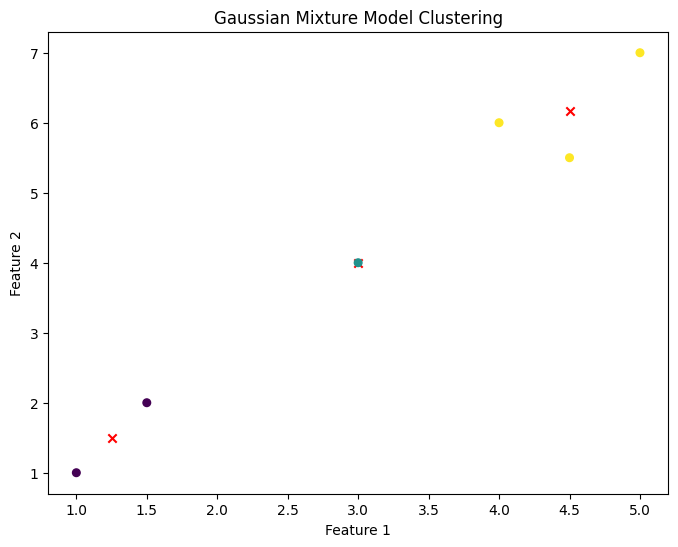

In [17]:
# Plotagem dos resultados
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, K))
for k in range(K):
    # Plotar contornos das distribuições gaussianas
    x, y = np.meshgrid(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100),
                       np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), num=100))
    xy = np.column_stack([x.flat, y.flat])

    # Plotar centros dos clusters
    plt.scatter(mu[k][0], mu[k][1], c='red', marker='x')

# Plotar pontos de dados
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### Exemplo 2

In [18]:
np.random.seed(42)

# Gerando dados de exemplo para três populações
X1 = np.random.normal(loc=[30, 20], scale=[5, 7], size=(50, 2))
X2 = np.random.normal(loc=[40, 25], scale=[6, 3], size=(50, 2))
X3 = np.random.normal(loc=[50, 20], scale=[5, 2], size=(50, 2))
X = np.vstack((X1, X2, X3))

# Parâmetros iniciais
K = 3  # número de populações
mu = np.array([[25, 25], [35, 30], [55, 15]])  # médias iniciais para cada população
sigma = np.array([np.eye(2) for _ in range(K)])  # covariâncias iniciais
p_i = np.full(K, 1/K)  # pesos iniciais uniformemente distribuídos

# Execute o modelo por um número de iterações
iterations = 100
mu, sigma, p_i, clusters = gaussian_mixture_model(X, mu, sigma, p_i, iterations)

Iteration 1
Weights: [0.29417232 0.3612737  0.34455398]
Means: [[28.33765419 18.37042224]
 [38.28465633 25.54440606]
 [51.16901151 20.3354497 ]]
Covariances: [[[11.66418481 -4.54703989]
  [-4.54703989 38.39905857]]

 [[17.22847621 -1.54149826]
  [-1.54149826 13.04836312]]

 [[23.02461898 -1.74174123]
  [-1.74174123  5.24423816]]]
-----
Iteration 2
Weights: [0.29054273 0.35950537 0.34995189]
Means: [[28.49527634 18.39675314]
 [38.19184636 25.44540342]
 [50.83158655 20.42123468]]
Covariances: [[[13.22761849 -3.73278588]
  [-3.73278588 40.35417962]]

 [[21.99349319 -1.02883238]
  [-1.02883238 13.12435144]]

 [[26.30505699 -2.88776491]
  [-2.88776491  5.23089147]]]
-----
Iteration 3
Weights: [0.28703811 0.36096933 0.35199256]
Means: [[28.58363476 18.33239769]
 [38.17178628 25.49110954]
 [50.61028219 20.38579014]]
Covariances: [[[13.94217896 -3.32867703]
  [-3.32867703 40.50020026]]

 [[26.11725474 -0.46699038]
  [-0.46699038 12.96840303]]

 [[28.3271226  -3.4280698 ]
  [-3.4280698   4.8341

Iteration 27
Weights: [0.24820081 0.38423302 0.36756617]
Means: [[29.14061194 17.12347268]
 [37.151026   25.93037417]
 [49.76112209 20.20285546]]
Covariances: [[[12.89888339 -0.78436522]
  [-0.78436522 35.2729119 ]]

 [[46.78593085  1.74476828]
  [ 1.74476828 10.8548433 ]]

 [[35.52113314 -4.11855358]
  [-4.11855358  3.35978361]]]
-----
Iteration 28
Weights: [0.24812453 0.38423717 0.3676383 ]
Means: [[29.1402509  17.1203262 ]
 [37.14886521 25.93149961]
 [49.75948811 20.20309913]]
Covariances: [[[12.89929242 -0.78874567]
  [-0.78874567 35.2505082 ]]

 [[46.78803098  1.74684551]
  [ 1.74684551 10.85140876]]

 [[35.53325642 -4.11992163]
  [-4.11992163  3.36006656]]]
-----
Iteration 29
Weights: [0.2480611  0.38424077 0.36769813]
Means: [[29.13994552 17.1177002 ]
 [37.14707772 25.9324392 ]
 [49.75812858 20.20330106]]
Covariances: [[[12.89963515 -0.79242198]
  [-0.79242198 35.23172546]]

 [[46.78975835  1.74849755]
  [ 1.74849755 10.8485435 ]]

 [[35.54337641 -4.12105975]
  [-4.12105975  3.3

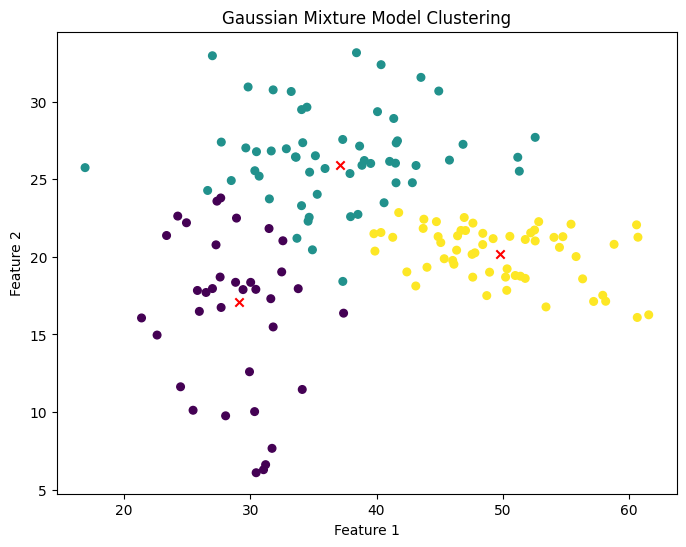

In [19]:
# Plotagem dos resultados
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, K))
for k in range(K):
    # Plotar contornos das distribuições gaussianas
    x, y = np.meshgrid(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100),
                       np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), num=100))
    xy = np.column_stack([x.flat, y.flat])

    # Plotar centros dos clusters
    plt.scatter(mu[k][0], mu[k][1], c='red', marker='x')

# Plotar pontos de dados
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Mistura Gaussiana no Python

In [20]:
import warnings
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Suprimir avisos de usuário específicos
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL*")

In [23]:
# Inicializar a Mistura Gaussiana
gmm = GaussianMixture(n_components=3, random_state=42)

In [25]:
# Gerando dados de exemplo para três populações
np.random.seed(42)
X1 = np.random.normal(loc=[30, 20], scale=[5, 7], size=(50, 2))
X2 = np.random.normal(loc=[40, 25], scale=[6, 3], size=(50, 2))
X3 = np.random.normal(loc=[50, 20], scale=[5, 2], size=(50, 2))
X = np.vstack((X1, X2, X3))


gmm.fit(X)

# Obtendo os parâmetros estimados
print("Means:\n", gmm.means_)
print("Covariances:\n", gmm.covariances_)

Means:
 [[37.07971706 25.73520062]
 [49.90125101 20.19175008]
 [28.92210682 16.8366407 ]]
Covariances:
 [[[45.86288805  1.70372241]
  [ 1.70372241 11.78234395]]

 [[34.63251743 -4.04923929]
  [-4.04923929  3.37589873]]

 [[12.29805347 -1.87118653]
  [-1.87118653 34.60943271]]]


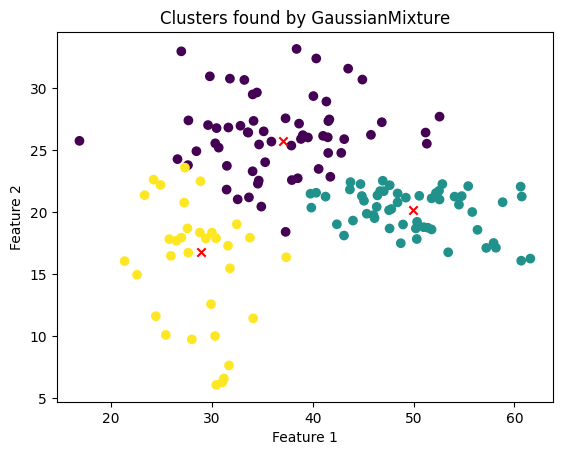

In [26]:
# Predição dos clusters
labels = gmm.predict(X)

# Plotagem dos resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x')  # Centros dos clusters
plt.title('Clusters found by GaussianMixture')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Aplicando a Mistura Gaussiana a Uma Imagem

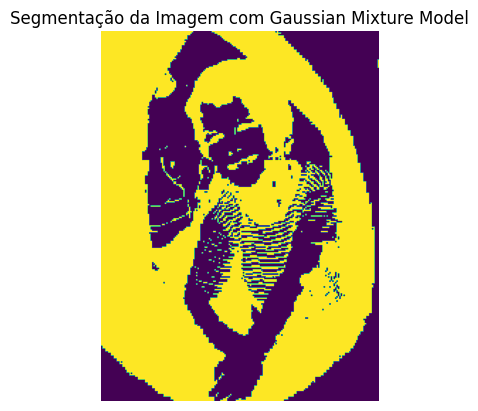

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Carregar a imagem
imagem_path = 'garoto.png'
imagem = Image.open(imagem_path)

# Converter a imagem para um array numpy e normalizar
dados_imagem = np.array(imagem) / 255.0

# Redimensionar a imagem de (altura, largura, canais) para (altura*largura, canais)
pixels = dados_imagem.reshape(-1, 3)

# Aplicar Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(pixels)
labels = gmm.predict(pixels)

# Pegar os rótulos e remodelar para o formato original para visualização
segmentada = labels.reshape(dados_imagem.shape[:2])

# Visualizar o resultado
plt.imshow(segmentada)
plt.title('Segmentação da Imagem com Gaussian Mixture Model')
plt.axis('off')  # Desativa as bordas e marcações
plt.show()


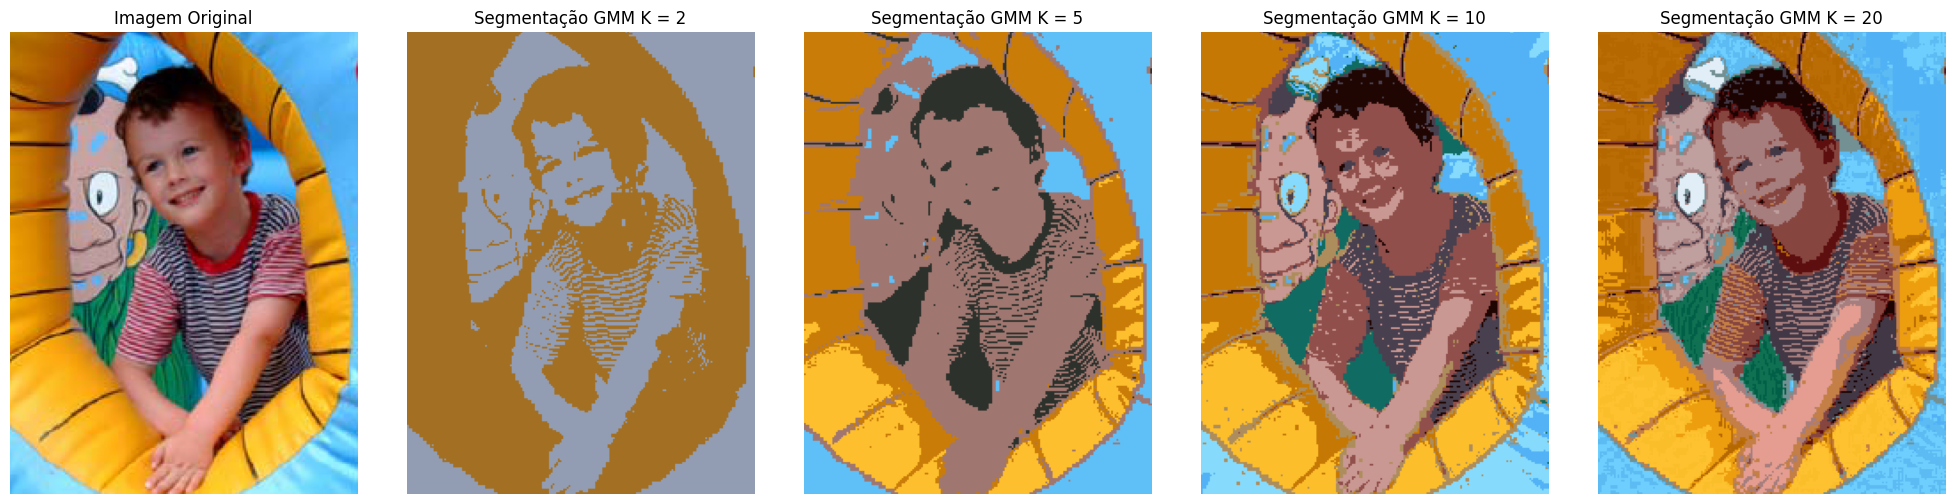

In [31]:
import numpy as np
from PIL import Image
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Carregar a imagem
imagem_path = 'garoto.png'
imagem = Image.open(imagem_path)

# Converter a imagem para um array numpy e normalizar
dados_imagem = np.array(imagem) / 255.0

# Redimensionar a imagem de (altura, largura, canais) para (altura*largura, canais)
pixels = dados_imagem.reshape(-1, 3)

# Valores de K para Gaussian Mixture
k_values = [2, 5, 10, 20]

# Configurar os subplots
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(20, 5))

# Plotar a imagem original
axes[0].imshow(imagem)
axes[0].set_title('Imagem Original')
axes[0].axis('off')

# Aplicar Gaussian Mixture para cada valor de K e plotar a segmentação
for i, k in enumerate(k_values):
    # Aplicar Gaussian Mixture
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(pixels)
    
    # Pegar os rótulos e remodelar para o formato original para visualização
    labels = gmm.predict(pixels)
    segmentada = labels.reshape(dados_imagem.shape[:2])
    
    # Criar uma imagem segmentada com cores
    segmented_image = np.zeros(dados_imagem.shape)
    for j in range(k):
        segmented_image[segmentada == j] = gmm.means_[j]
    
    # Plotar a imagem segmentada
    axes[i + 1].imshow(segmented_image)
    axes[i + 1].set_title(f'Segmentação GMM K = {k}')
    axes[i + 1].axis('off')

# Mostrar os plots
plt.tight_layout()
plt.show()